Missing values after cleaning:
 ORDERNUMBER         0
QUANTITYORDERED     0
PRICEEACH           0
ORDERLINENUMBER     0
SALES               0
ORDERDATE           0
STATUS              0
QTR_ID              0
MONTH_ID            0
YEAR_ID             0
PRODUCTLINE         0
MSRP                0
PRODUCTCODE         0
CUSTOMERNAME        0
PHONE               0
ADDRESSLINE1        0
CITY                0
STATE               0
POSTALCODE          0
COUNTRY             0
CONTACTLASTNAME     0
CONTACTFIRSTNAME    0
DEALSIZE            0
dtype: int64


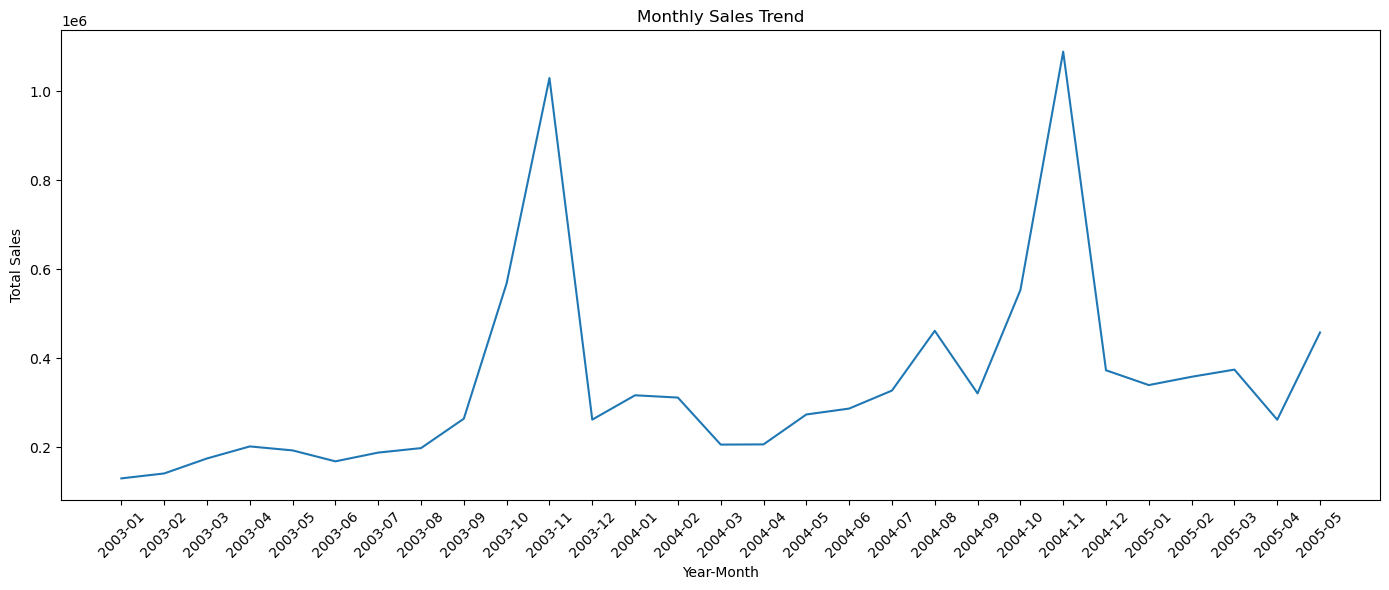

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA


# Load the data
data = pd.read_csv("C:\\Users\\user\\Downloads\\sales_data_sample.csv", encoding='ISO-8859-1')

# Drop unwanted columns
data_cleaned = data.drop(columns=['ADDRESSLINE2', 'TERRITORY'])

# Fill missing values by directly assigning the modified Series back to the DataFrame columns
data_cleaned['STATE'] = data_cleaned['STATE'].fillna('Unknown')
data_cleaned['POSTALCODE'] = data_cleaned['POSTALCODE'].fillna('00000')
data_cleaned['ORDERDATE'] = pd.to_datetime(data_cleaned['ORDERDATE'], errors='coerce')
print("Missing values after cleaning:\n", data_cleaned.isnull().sum())
data_cleaned['YEAR_MONTH'] = data_cleaned['ORDERDATE'].dt.to_period('M')
monthly_sales = data_cleaned.groupby('YEAR_MONTH')['SALES'].sum()
plt.figure(figsize=(14, 6))
sns.lineplot(x=monthly_sales.index.astype(str), y=monthly_sales.values)
plt.xticks(rotation=45)
plt.xlabel("Year-Month")
plt.ylabel("Total Sales")
plt.title("Monthly Sales Trend")
plt.tight_layout()
plt.show()



In [21]:
data_cleaned.to_csv('cleaned_sales_data.csv', index=False)

In [22]:
data = pd.read_csv('cleaned_sales_data.csv')
data

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,PHONE,ADDRESSLINE1,CITY,STATE,POSTALCODE,COUNTRY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE,YEAR_MONTH
0,10107,30,95.70,2,2871.00,2003-02-24,Shipped,1,2,2003,...,2125557818,897 Long Airport Avenue,NYC,NY,10022,USA,Yu,Kwai,Small,2003-02
1,10121,34,81.35,5,2765.90,2003-05-07,Shipped,2,5,2003,...,26.47.1555,59 rue de l'Abbaye,Reims,Unknown,51100,France,Henriot,Paul,Small,2003-05
2,10134,41,94.74,2,3884.34,2003-07-01,Shipped,3,7,2003,...,+33 1 46 62 7555,27 rue du Colonel Pierre Avia,Paris,Unknown,75508,France,Da Cunha,Daniel,Medium,2003-07
3,10145,45,83.26,6,3746.70,2003-08-25,Shipped,3,8,2003,...,6265557265,78934 Hillside Dr.,Pasadena,CA,90003,USA,Young,Julie,Medium,2003-08
4,10159,49,100.00,14,5205.27,2003-10-10,Shipped,4,10,2003,...,6505551386,7734 Strong St.,San Francisco,CA,00000,USA,Brown,Julie,Medium,2003-10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2818,10350,20,100.00,15,2244.40,2004-12-02,Shipped,4,12,2004,...,(91) 555 94 44,"C/ Moralzarzal, 86",Madrid,Unknown,28034,Spain,Freyre,Diego,Small,2004-12
2819,10373,29,100.00,1,3978.51,2005-01-31,Shipped,1,1,2005,...,981-443655,Torikatu 38,Oulu,Unknown,90110,Finland,Koskitalo,Pirkko,Medium,2005-01
2820,10386,43,100.00,4,5417.57,2005-03-01,Resolved,1,3,2005,...,(91) 555 94 44,"C/ Moralzarzal, 86",Madrid,Unknown,28034,Spain,Freyre,Diego,Medium,2005-03
2821,10397,34,62.24,1,2116.16,2005-03-28,Shipped,1,3,2005,...,61.77.6555,1 rue Alsace-Lorraine,Toulouse,Unknown,31000,France,Roulet,Annette,Small,2005-03


In [24]:
customer_data = data.groupby('CUSTOMERNAME').agg({
    'SALES': ['sum', 'mean', 'count']
}).reset_index()
customer_data

CUSTOMERNAME      SALES                   
                                       sum         mean count
0                AV Stores, Co.  157807.81  3094.270784    51
1                  Alpha Cognac   70488.44  3524.422000    20
2            Amica Models & Co.   94117.26  3619.894615    26
3       Anna's Decorations, Ltd  153996.13  3347.741957    46
4             Atelier graphique   24179.96  3454.280000     7
..                          ...        ...          ...   ...
87              Vida Sport, Ltd  117713.56  3797.211613    31
88              Vitachrome Inc.   88041.26  3521.650400    25
89     Volvo Model Replicas, Co   75754.88  3987.098947    19
90  West Coast Collectables Co.   46084.64  3544.972308    13
91            giftsbymail.co.uk   78240.84  3009.263077    26

[92 rows x 4 columns]

In [25]:
customer_data.columns = ['CUSTOMERNAME', 'TotalSales', 'AverageOrderValue', 'OrderFrequency']

In [26]:
print(customer_data.head())

              CUSTOMERNAME  TotalSales  AverageOrderValue  OrderFrequency
0           AV Stores, Co.   157807.81        3094.270784              51
1             Alpha Cognac    70488.44        3524.422000              20
2       Amica Models & Co.    94117.26        3619.894615              26
3  Anna's Decorations, Ltd   153996.13        3347.741957              46
4        Atelier graphique    24179.96        3454.280000               7


In [8]:
import pandas as pd


data = pd.read_csv('cleaned_sales_data.csv')


customer_data = data.groupby('CUSTOMERNAME').agg(
    TotalSales=('SALES', 'sum'), 
    AverageOrderValue=('SALES', 'mean'), 
    OrderFrequency=('SALES', 'count')
).reset_index()


print(customer_data.head())


              CUSTOMERNAME  TotalSales  AverageOrderValue  OrderFrequency
0           AV Stores, Co.   157807.81        3094.270784              51
1             Alpha Cognac    70488.44        3524.422000              20
2       Amica Models & Co.    94117.26        3619.894615              26
3  Anna's Decorations, Ltd   153996.13        3347.741957              46
4        Atelier graphique    24179.96        3454.280000               7


In [9]:
from sklearn.preprocessing import StandardScaler


features = customer_data[['TotalSales', 'AverageOrderValue', 'OrderFrequency']]
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)


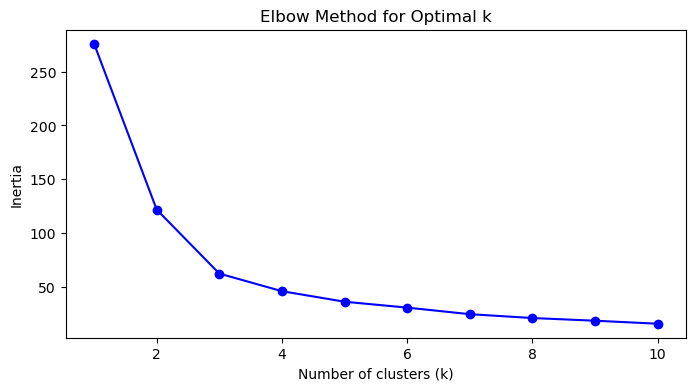

In [10]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
inertia = []
K_range = range(1, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_features)
    inertia.append(kmeans.inertia_)
plt.figure(figsize=(8, 4))
plt.plot(K_range, inertia, 'bo-')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()


In [12]:
kmeans = KMeans(n_clusters=4, random_state=42)
customer_data['Cluster'] = kmeans.fit_predict(scaled_features)


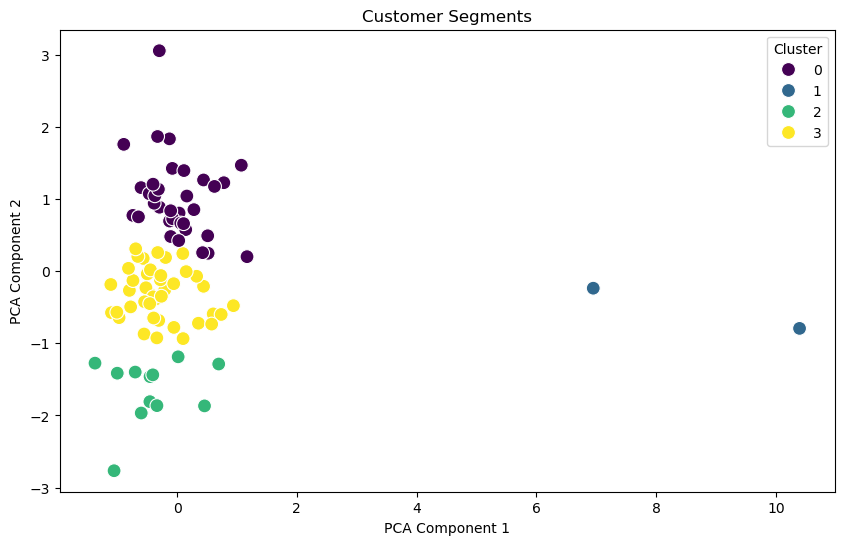

In [13]:
from sklearn.decomposition import PCA
import seaborn as sns


pca = PCA(n_components=2)
customer_data[['PCA1', 'PCA2']] = pca.fit_transform(scaled_features)


plt.figure(figsize=(10, 6))
sns.scatterplot(data=customer_data, x='PCA1', y='PCA2', hue='Cluster', palette='viridis', s=100)
plt.title('Customer Segments')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend(title='Cluster')
plt.show()


In [3]:
import pandas as pd

# Load the cleaned dataset
data = pd.read_csv('cleaned_sales_data.csv')

# Convert 'ORDERDATE' to datetime format
data['ORDERDATE'] = pd.to_datetime(data['ORDERDATE'])

# Resample by 'ME' for month-end frequency to aggregate sales data
monthly_sales = data.resample('ME', on='ORDERDATE')['SALES'].sum().reset_index()

# Rename columns for clarity
monthly_sales.columns = ['Date', 'MonthlySales']

# Display the first few rows of the monthly sales data
print(monthly_sales.head())


        Date  MonthlySales
0 2003-01-31     129753.60
1 2003-02-28     140836.19
2 2003-03-31     174504.90
3 2003-04-30     201609.55
4 2003-05-31     192673.11


In [18]:
import numpy as np


def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i + seq_length])
        y.append(data[i + seq_length])
    return np.array(X), np.array(y)


sequence_length = 12
sales_values = monthly_sales['MonthlySales'].values
X, y = create_sequences(sales_values, sequence_length)

print("Shape of X:", X.shape)
print("Shape of y:", y.shape)


Shape of X: (17, 12)
Shape of y: (17,)


In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)


In [ ]:
!pip install tensorflow
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

model = Sequential([
    LSTM(50, activation='relu', input_shape=(X_train.shape[1], 1)),
    Dense(1)
])

model.compile(optimizer='adam', loss='mse')
X_train_reshaped = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test_reshaped = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))
history = model.fit(X_train_reshaped, y_train, epochs=50, batch_size=16, validation_data=(X_test_reshaped, y_test))
# Predict on test data
predictions = model.predict(X_test_reshaped)

# Calculate Mean Squared Error (MSE)
mse = tf.keras.losses.MeanSquaredError()
error = mse(y_test, predictions).numpy()
print("Mean Squared Error on Test Data:", error)
import matplotlib.pyplot as plt

# Ensure predictions have been made on test data
predictions = model.predict(X_test_reshaped)

# Plot the actual vs. predicted sales
plt.figure(figsize=(10, 6))
plt.plot(y_test, label='Actual Sales', marker='o')
plt.plot(predictions, label='Predicted Sales', marker='o')
plt.title("Sales Prediction - Actual vs. Predicted")
plt.xlabel("Time")
plt.ylabel("Sales")
plt.legend()
plt.show()
